# 🌎 **Air Quality Prediction** 

## **Project Overview**
This notebook explores **Air Quality Index (AQI)** prediction across different states in the US. Using machine learning models like **Linear Regression**, we aim to predict AQI based on historical pollutant data.
---
## **📊 Data Overview**
The dataset contains:
- **Particle Concentration Levels**: PM2.5, PM10, NO2, O3, CO
- **Location**: State and Population
---
## **📈 Results and Evaluation**
Key evaluation metrics:
- **Mean Absolute Error (MAE)**
- **Root Mean Squared Error (RMSE)**
- **R-Squared (R²)**
We'll also visualize **predicted vs. actual AQI values** to gauge model performance.
---


In [27]:
# Data Cleaning
import pandas as pd 
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Split Data for Models
from sklearn.model_selection import train_test_split

# Metrics
from sklearn import metrics

# statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot


In [28]:
df = pd.read_csv('../Processed_Data/AQI_Final.csv')

In [29]:
df.describe()

,Year,Ozone Average,Carbon Average,Nitrogen Average,Sulfur Average,PM2.5 Average,PM10 Average,Ozone AQI,Carbon AQI,Nitrogen AQI,...,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Gasoline,Diesel,Unknown Fuel,Renewable Vehicles,Non-Renewable Vehicles
count,54.0,54.0,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.000000,54.000000,...,5.000000e+01,50.000000,5.000000e+01,50.000000,5.000000e+01,5.000000e+01,50.00000,50.000000,5.000000e+01,5.000000e+01
mean,2023.0,0.0,0.237037,10.518519,2.055556,7.759259,18.305556,0.0,2.444444,9.814815,...,7.095600e+04,26070.000000,1.474840e+05,56064.000000,4.044760e+05,4.852168e+06,143650.00000,33870.000000,7.050500e+05,5.029688e+06
std,0.0,0.0,0.097702,5.258383,5.342661,2.447141,11.084519,0.0,1.143755,4.895412,...,1.799962e+05,58503.337599,2.477670e+05,68971.516629,3.969715e+05,5.503790e+06,145190.66177,25817.999179,8.375451e+05,5.651778e+06
min,2023.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,1.000000e+03,800.000000,8.200000e+03,3100.000000,3.660000e+04,4.543000e+05,11000.00000,3700.000000,7.060000e+04,4.892000e+05
25%,2023.0,0.0,0.200000,7.250000,0.250000,7.000000,14.025000,0.0,2.000000,7.250000,...,8.250000e+03,4950.000000,3.650000e+04,22925.000000,1.274250e+05,1.575850e+06,63075.00000,13400.000000,2.375000e+05,1.703600e+06
50%,2023.0,0.0,0.200000,11.000000,1.000000,8.200000,18.600000,0.0,2.000000,10.000000,...,2.585000e+04,11750.000000,7.920000e+04,44450.000000,3.328000e+05,3.491250e+06,116550.00000,27700.000000,5.122000e+05,3.657600e+06
75%,2023.0,0.0,0.300000,14.000000,2.000000,9.175000,21.175000,0.0,3.000000,13.000000,...,7.162500e+04,29025.000000,1.750250e+05,67125.000000,5.312500e+05,5.611125e+06,173425.00000,46650.000000,7.996500e+05,5.882650e+06
max,2023.0,0.0,0.500000,20.000000,39.000000,12.600000,54.400000,0.0,6.000000,19.000000,...,1.256600e+06,410700.000000,1.703200e+06,460700.000000,2.315400e+06,3.119190e+07,772800.00000,121800.000000,4.886700e+06,3.193510e+07


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            54 non-null     int64  
 1   State Name                      54 non-null     object 
 2   Ozone Average                   54 non-null     int64  
 3   Carbon Average                  54 non-null     float64
 4   Nitrogen Average                54 non-null     int64  
 5   Sulfur Average                  54 non-null     int64  
 6   PM2.5 Average                   54 non-null     float64
 7   PM10 Average                    54 non-null     float64
 8   Ozone AQI                       54 non-null     int64  
 9   Carbon AQI                      54 non-null     int64  
 10  Nitrogen AQI                    54 non-null     int64  
 11  Sulfur AQI                      54 non-null     int64  
 12  PM2.5 AQI                       54 non

In [31]:
df.isnull().sum()

Year                              0
State Name                        0
Ozone Average                     0
Carbon Average                    0
Nitrogen Average                  0
Sulfur Average                    0
PM2.5 Average                     0
PM10 Average                      0
Ozone AQI                         0
Carbon AQI                        0
Nitrogen AQI                      0
Sulfur AQI                        0
PM2.5 AQI                         0
PM10 AQI                          0
Overall AQI                       0
Population                        4
Electric (EV)                     4
Plug-In Hybrid Electric (PHEV)    4
Hybrid Electric (HEV)             4
Biodiesel                         4
Ethanol/Flex (E85)                4
Gasoline                          4
Diesel                            4
Unknown Fuel                      4
Renewable Vehicles                4
Non-Renewable Vehicles            4
dtype: int64

In [32]:
df = df.dropna()

In [33]:
df.isnull().sum()

Year                              0
State Name                        0
Ozone Average                     0
Carbon Average                    0
Nitrogen Average                  0
Sulfur Average                    0
PM2.5 Average                     0
PM10 Average                      0
Ozone AQI                         0
Carbon AQI                        0
Nitrogen AQI                      0
Sulfur AQI                        0
PM2.5 AQI                         0
PM10 AQI                          0
Overall AQI                       0
Population                        0
Electric (EV)                     0
Plug-In Hybrid Electric (PHEV)    0
Hybrid Electric (HEV)             0
Biodiesel                         0
Ethanol/Flex (E85)                0
Gasoline                          0
Diesel                            0
Unknown Fuel                      0
Renewable Vehicles                0
Non-Renewable Vehicles            0
dtype: int64

In [34]:
df = df[df['Year'] == 2023]

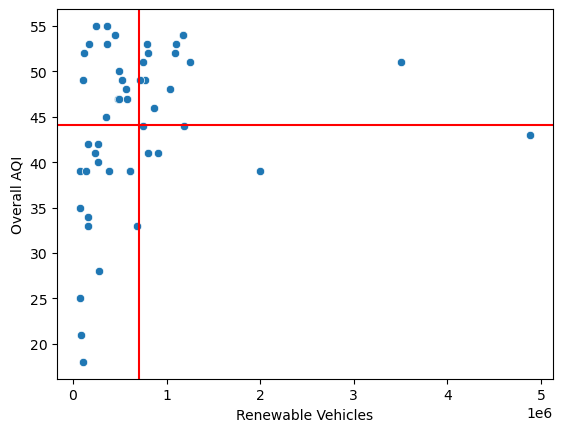

In [35]:
ax = sns.scatterplot(df, x='Renewable Vehicles', y='Overall AQI')
ax.axvline(x=df['Renewable Vehicles'].mean(), color='red',  label='Mean Renewable Vehicles')
ax.axhline(y=df['Overall AQI'].mean(), color='red',  label='Mean Overall AQI')

c:\Users\arnan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\arnan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


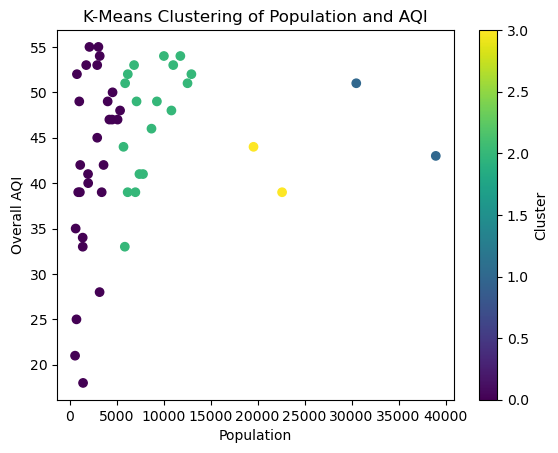

In [36]:
X = df[['Population','Overall AQI']]

kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)


plt.scatter(df['Population'], df['Overall AQI'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Population')
plt.ylabel('Overall AQI')
plt.title('K-Means Clustering of Population and AQI')
plt.colorbar(label='Cluster')
plt.show()

In [37]:
X = df[['Population', 'Renewable Vehicles', 'Non-Renewable Vehicles']]
y = df['Overall AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=5000, random_state=42)  
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 4.97092
